This notebook examines the basic stats and shape of the data.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
np.random.seed(23)
import matplotlib.pyplot as plt
# the variable 'now' references the datetime that the data was saved. 
# Other notebooks call it to reference the most recent version of the cleaned data.
now = '2020-07-07-09-58'
%store now

Stored 'now' (str)


In [2]:
# this is only needed if the genre_data_loader.py script is not in the directory of the nb or script from which you call it
import importlib.util
spec = importlib.util.spec_from_file_location("genre_data_loader", "/Users/Daniel/Code/Genre/src/genre_scripts/genre_data_loader.py")
genre_data_loader = importlib.util.module_from_spec(spec)
spec.loader.exec_module(genre_data_loader)
# if the genre_data_loader.py script is in the directory in which you are calling it, only the next line is needed:
LoadGenreData = genre_data_loader.LoadGenreData

In [3]:
# get currrent date for latest version of data set
# %store -r now # not needed in this nb where 'now' is defined

X_path_train = '/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/wiki-kaggle_X_train_{}.csv'.format(now)
y_path_train = '/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/wiki-kaggle_y_train_{}.csv'.format(now)
X_path_test = '/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/wiki-kaggle_X_test_{}.csv'.format(now)
y_path_test = '/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/wiki-kaggle_y_test_{}.csv'.format(now)

In [4]:
# call data loader script
genre_data = LoadGenreData(now, X_path_train = X_path_train, y_path_train = y_path_train, 
                                             X_path_test = X_path_test, y_path_test = y_path_test)
# get currrent date for latest version of data set
# %store -r now # not needed in this nb where 'now' is defined

X_path_train = '/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/wiki-kaggle_X_train_{}.csv'.format(now)
y_path_train = '/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/wiki-kaggle_y_train_{}.csv'.format(now)
X_path_test = '/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/wiki-kaggle_X_test_{}.csv'.format(now)
y_path_test = '/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/wiki-kaggle_y_test_{}.csv'.format(now)
data = genre_data.data
genre_list = genre_data.get_list_of_genres()

In [5]:
print('There are {} artists with genre and binary-gender labels.'.format(data.shape[0]))
print('There are {} unique genre labels.'.format(len(genre_list)))
print('Previously there were 1669 unique genre lables.')

There are 15470 artists with genre and binary-gender labels.
There are 1491 unique genre labels.
Previously there were 1669 unique genre lables.


In [6]:
data_male = data[data.gender == 'male']
data_female = data[data.gender == 'female']

In [7]:
tot = data.shape[0]
m = data_male.shape[0]
f = data_female.shape[0]
print('{} total artists'.format(tot))
print('{} female artists, or {:0.0f}%'.format(f, 100*f/(f+m)))
print('{} male artists, or {:0.0f}%'.format(m, 100*m/(f+m)))

15470 total artists
4855 female artists, or 31%
10615 male artists, or 69%


### Count the min, mean, max of number of genres:

In [8]:
n = data.shape[0]
a,b,c = data.genrelist_length.mean(), data.genrelist_length.std(), data.genrelist_length.max()
print('Total:')
print(f'{n} Artists.')
print(f'Mean number of genre labels: {round(a,2)}.')
print(f'STD of the number of genre labels: {round(b,2)}.')
print(f'Max number of genre labels: {c}.')

Total:
15470 Artists.
Mean number of genre labels: 2.71.
STD of the number of genre labels: 1.8.
Max number of genre labels: 73.


### Count the min, mean, max of number of genres for male and female artists:

In [9]:
data_female = data[data.gender == 'female']
n = data_female.shape[0]
a,b,c = data_female.genrelist_length.mean(), data_female.genrelist_length.std(), data_female.genrelist_length.max()
print('Female:')
print(f'{n} Artists.')
print(f'Mean number of genre labels: {round(a,2)}.')
print(f'STD of the number of genre labels: {round(b,2)}.')
print(f'Max number of genre labels: {c}.')

Female:
4855 Artists.
Mean number of genre labels: 2.63.
STD of the number of genre labels: 1.53.
Max number of genre labels: 11.


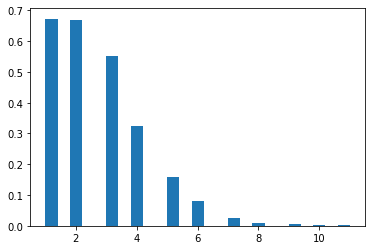

In [10]:
plt.hist(data_female.genrelist_length, bins = 25, density = True)
plt.show()

In [11]:
data_male = data[data.gender == 'male']
m = data_male.shape[0]
a,b,c = data_male.genrelist_length.mean(), data_male.genrelist_length.std(), data_male.genrelist_length.max()
print('Male:')
print(f'{m} Artists.')
print(f'Mean number of genre labels: {round(a,2)}.')
print(f'STD of the number of genre labels: {round(b,2)}.')
print(f'Max number of genre labels: {c}.')

Male:
10615 Artists.
Mean number of genre labels: 2.74.
STD of the number of genre labels: 1.92.
Max number of genre labels: 73.


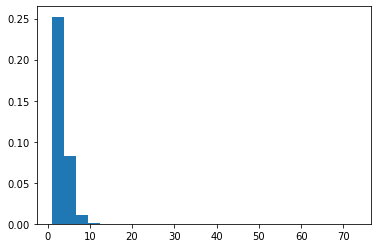

In [12]:
plt.hist(data_male.genrelist_length, bins = 25, density = True)
plt.show()

Set variables:

In [13]:
max_num_male = 73
max_num_female = 11
max_num = max(max_num_female, max_num_male)

### The histograms for genre labels for male and female artists. 

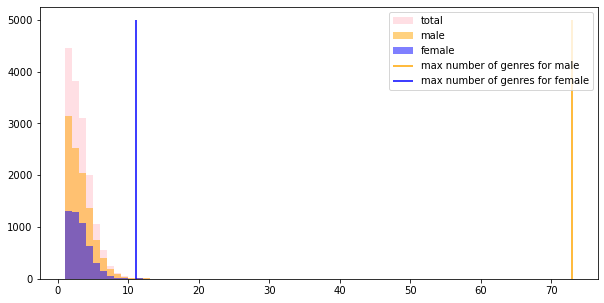

In [14]:
plt.figure(figsize = (10, 5))
plt.hist(data.genrelist_length, bins = range(1,max_num), density = False, color = 'pink', alpha = .5, label = 'total')
plt.hist(data_male.genrelist_length, bins = range(1,max_num), density = False, color = 'orange', alpha = .5, label = 'male')
plt.vlines(x = max_num_male, ymin = 0 , ymax = 5000, label = 'max number of genres for male', color = 'orange')
plt.vlines(x = max_num_female, ymin = 0 , ymax = 5000, label = 'max number of genres for female', color = 'blue')
plt.hist(data_female.genrelist_length, bins = range(1,max_num), density = False, color = 'blue', alpha = .5,label = 'female')
plt.legend()
plt.show()

Here are the histograms as densities: the heights are scaled so as the sum of all heights is 1.

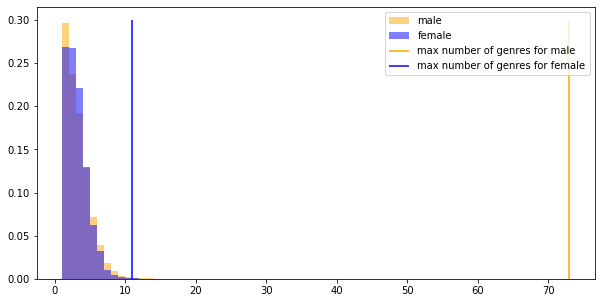

In [15]:
plt.figure(figsize = (10, 5))
plt.hist(data_male.genrelist_length, bins = range(1,max_num), density = True, color = 'orange', alpha = .5, label = 'male')
plt.vlines(x = max_num_male, ymin = 0 , ymax = .3, label = 'max number of genres for male', color = 'orange')
plt.vlines(x = max_num_female, ymin = 0 , ymax = .3, label = 'max number of genres for female', color = 'blue')
plt.hist(data_female.genrelist_length, bins = range(1,max_num), density = True, color = 'blue', alpha = .5,label = 'female')
plt.legend()
plt.show()

Here are the histograms as densities; three bins: $[1, mean)$, $[mean,2 \cdot mean)$, $[2 \cdot mean,max]$

In [16]:
# plt.figure(figsize = (10, 5))
# plt.hist(data_male.genrelist_length, bins = [0,data_male.genrelist_length.mean(),2*data_male.genrelist_length.mean(),max_num], density = False, color = 'orange', alpha = .5, label = 'male')
# plt.hist(data_female.genrelist_length, bins = [0,data_female.genrelist_length.mean(),2*data_female.genrelist_length.mean(),max_num], density = False, color = 'blue', alpha = .5, label = 'female')
# plt.legend()
# plt.show()

## What are the most common genre labels? 



### Count the number of times that a label occurs:

### Take a look at the most frequent genres:

In [17]:
# import a UDF to create a DataFrame with the frequencies of genres
spec = importlib.util.spec_from_file_location("genre_frequency_by_gender", "/Users/Daniel/Code/Genre/src/genre_scripts/genre_frequency_by_gender.py")
genre_frequency_by_gender = importlib.util.module_from_spec(spec)
spec.loader.exec_module(genre_frequency_by_gender)
frequency_by_gender = genre_frequency_by_gender.frequency_by_gender
# from src.genre_scripts.genre_frequency_by_gender import frequency_by_gender

In [19]:
genre_frequencies = frequency_by_gender(genre_data.get_sparse_X_vector(), data, genre_data.get_dict_id_to_genre())
# sort by frequences descending
genre_frequencies.sort_values(['frequency'], ascending = False, inplace = True)
genre_frequencies.set_index('genre', inplace = True)

In [21]:
genre_frequencies.head(20)

,frequency,female,male
genre,,,
pop,3279,1669,1610
rock,2208,461,1747
country,2026,634,1392
r_and_b,1926,940,986
hip_hop,1395,248,1147
soul,1304,676,628
folk,1283,530,753
jazz,1173,489,684
alternative_rock,1151,242,909
